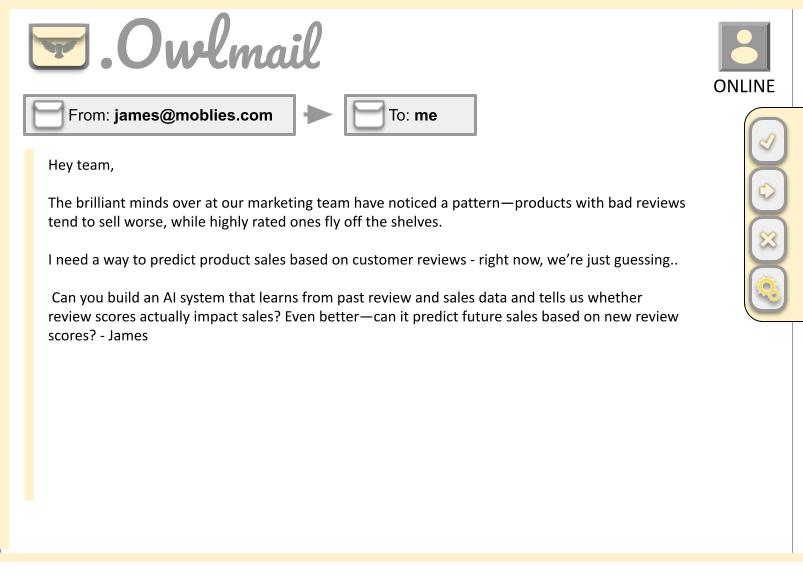

---
Hey team,

The brilliant minds of our marketing team have noticed a pattern—products with bad reviews tend to sell worse, while highly rated ones fly off the shelves.

I need a way to predict product sales based on customer reviews - right now, we’re just guessing..

 Can you build an AI system that learns from past review and sales data and tells us whether review scores actually impact sales? Even better—can it predict future sales based on new review scores? - James

---

#Step 1: Understanding the problem

James wants an AI tool that can predict product sales based on customer reviews.

📌 To do this, we need a **dataset** containing:

* Average Review Score (on a scale of 1 to 5)
* Units Sold (total number of products purchased)


Our AI model will use **Linear Regression**, which finds relationships between numerical values.

It will analyze past reviews and corresponding sales numbers.
It will then predict how future reviews might impact sales.

# Step 2: Importing dependencies
Before we start coding, we need to import dependencies—pre-written Python code libraries that help us perform complex tasks efficiently.

Below is a list of the libraries we will import and what they do. You don’t need to memorize them—just know that they help us work with data and machine learning. You can read the **comments** after each library to know what they are for!

Let's import them now by running the code below!

In [ ]:
# Importing necessary Python libraries

import numpy as np  # Helps with working with numbers and large datasets
import pandas as pd  # Organizes data into tables (DataFrames)
import matplotlib.pyplot as plt  # Creates charts and graphs for better understanding
from sklearn.model_selection import train_test_split  # Splits data into training and test sets
from sklearn.linear_model import LinearRegression  # A machine learning model for numerical predictions
from sklearn.metrics import mean_absolute_error, mean_squared_error  # Measures prediction accuracy

# Confirm imports
print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!



#Step 3: Our dataset

The customer has provided us with the following dataset of sales figures. It is a Python **list of lists,** where **each row represents a different product.**

*  First number is the product's name.

*  The second number is the product’s **average review score.**

*  The third number is **the total number of units sold.**

*  **Discuss:** Based on this data, do products with higher ratings seem to sell
more? Are there exceptions?

</br>


In [ ]:
sales_data = [
    ["Gaming Keyboard", 4.7, 4700],
    ["Wireless Earbuds", 3.2, 1400],
    ["Smartphone Case", 4.5, 3100],
    ["Budget Gaming Mouse", 2.1, 300],
    ["Reusable Water Bottle", 4.9, 4900],
    ["Mechanical Pencil Set", 3.8, 2100],
    ["Noise-Canceling Headphones", 4.7, 5300],
    ["Heated Blanket", 4.2, 2800],
    ["Hand Strength Trainer", 2.9, 900],
    ["Wireless Charging Pad", 4.4, 4000],
    ["Budget Smartphone", 3.5, 1700],
    ["Mini Projector", 4.6, 4500],
    ["Robot Vacuum", 3.0, 1300],
    ["Adjustable Desk Lamp", 4.1, 2900],
    ["USB Desk Fan", 2.5, 700],
    ["Bulk Pack of Pencils", 2.3, 4600],
    ["Luxury Leather Notebook", 4.9, 400],
    ["Glow-in-the-Dark Stickers", 2.1, 5200],
    ["High-End Gaming Mouse", 4.8, 600],
    ["Alarm Clock with Radio", 3.0, 4800],
    ["klgjlafkgjöajöa", 2.5, 2000]
]

📝 **Task 1:**

Work in groups to answer the questions:

1. Can you spot any trends just by looking at the numbers?
2. Do higher-rated products always sell more?

</br>

# Step 4: Visualizing the Data

Before we apply machine learning, let's visualize our data by plotting a graph. This will help us see patterns between review scores and sales numbers.

We will create a **scatter plot**, where:



*   Each dot represents a product.
*   The x-axis (↔) shows the review scores (1 to 5 stars).
*   The y-axis (↕) shows the number of units sold.

By looking at this graph, we can get a better idea of whether better reviews lead to more sales or if there are exceptions.

Generate the graph by running the code below.


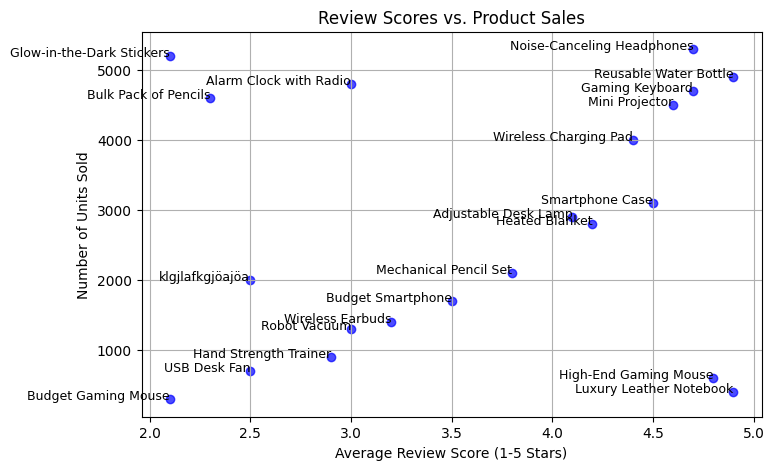

In [ ]:
# prompt: Visualize the above data with a graph

import matplotlib.pyplot as plt

# Extract review scores and sales numbers
product_names = [row[0] for row in sales_data]  # Names of products
review_scores = [row[1] for row in sales_data]  # Review scores
sales_numbers = [row[2] for row in sales_data]  # Sales numbers

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(review_scores, sales_numbers, color="blue", alpha=0.7)

# Label each point with the product name
for i, name in enumerate(product_names):
    plt.text(review_scores[i], sales_numbers[i], name, fontsize=9, ha="right")

# Add labels and title
plt.xlabel("Average Review Score (1-5 Stars)")
plt.ylabel("Number of Units Sold")
plt.title("Review Scores vs. Product Sales")
plt.grid(True)

# Show the graph
plt.show()


-----

📝 **Task 2:**

Discuss with your group:

1. Are there outliers (unusual cases where a product doesn’t follow the trend)?


</br>

# Step 5: Training the Model.

Now that we have our dataset and idea on what to expect to find out from the data, it’s time to train a **linear regression model**. The goal is to find a relationship between **review scores** and **sales numbers**, specifically whether higher-rated products tend to sell more than lower-rated products.

* The model will analyze the relationship between review scores (input) and sales (output).
* It will try to find a best-fit line that predicts sales based on a product’s average rating.
* If the relationship is strong, we should see a clear pattern where certain review scores consistently lead to more (or fewer) sales.


**Preparing the data** </br>

First, we need to separate our **independent variable** (review scores) and **dependent variable** (units sold).

* **The independent variable** (average_review_scores) is what we use to make predictions.
* **The dependent variable** (units_sold is what we want to predict.

Then, we define and train the AI model using the `LinearRegression()` function we imported from the `sklearn` library, with the review_scores and units_sold as inputs.
Since the function expects the input in a specific format, we need to slightly reshape our data. You don’t need to worry about this for now—just run the code and voilá, our model is learning!
```
model = LinearRegression()
model.fit(X, y)

```



In [ ]:
# Extract features (independent variable) and target (dependent variable)
average_review_scores = [row[1] for row in sales_data]  # X-axis: Review scores
units_sold = [row[2] for row in sales_data]  # Y-axis: Units sold

# Reshape the data for sklearn
X = np.array(average_review_scores).reshape(-1, 1)
y = np.array(units_sold).reshape(-1, 1)

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

print("✅ Model training complete! The AI is now ready to predict sales based on review scores.")


✅ Model training complete! The AI is now ready to predict sales based on review scores.


# Step 6: Making Predictions

Now that our model is trained, let’s use it to predict sales for new products based on their review scores.

- We give the model new products and their reviews

- The model uses the best-fit line it found during training to estimate how many units that product might sell.

---

📝 **Task 3**
* Come up with suitable training data for the test_products **list of lists**, following the syntax you can see in the first item `["Mystery Gadget", 1.5]`
* Discuss your results in a group. Do they make sense?



In [ ]:
test_products = [
    ["Mystery Gadget", 1.5],
    ["add data here", 1.0],
    ["add data here", 1.0],
    ["add data here", 1.0],
    ["add data here", 1.0]
]

# Extract only the review scores for prediction
test_review_scores = [[product[1]] for product in test_products]

# Make predictions using the trained model
predicted_sales = model.predict(test_review_scores)

# Display predictions
print("🔍 Predicted Sales Based on Review Scores:")
for product, sales in zip(test_products, predicted_sales):
    print(f"Product: {product[0]} | Review Score: {product[1]} → Predicted Sales: {int(sales)} units")

🔍 Predicted Sales Based on Review Scores:
Product: Mystery Gadget | Review Score: 1.5 → Predicted Sales: 1987 units
Product: add data here | Review Score: 1.0 → Predicted Sales: 1805 units
Product: add data here | Review Score: 1.0 → Predicted Sales: 1805 units
Product: add data here | Review Score: 1.0 → Predicted Sales: 1805 units
Product: add data here | Review Score: 1.0 → Predicted Sales: 1805 units


<ipython-input-8-fdd65d41bb50>:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Product: {product[0]} | Review Score: {product[1]} → Predicted Sales: {int(sales)} units")


#Step 7: Evaluating the AI's performance

Now that we have trained our model and made predictions, it's time to evaluate how well it performs.




💡 **How do we know if the model is good?**
- A **good model** should make predictions that are close to real sales numbers.


- A **bad model** might give results that are way off, meaning review scores alone aren’t enough to predict sales.

Since we don’t have real sales numbers for our test products, we will check how well the model performed on the training data.


📌 **Measuring Model Accuracy**
A common way to evaluate a model’s accuracy is by calculating the Mean Absolute Error (MAE).
This tells us, on average, how far off our predictions are from the actual sales numbers.

- **A low MAE **→ The model is making accurate predictions.
- **A high MAE ** → The model’s predictions are far off, meaning review scores alone might not be a strong predictor of sales.

Let’s calculate the MAE for our model:



In [ ]:
import numpy as np

# Convert list to NumPy array and reshape it
average_review_scores_array = np.array(average_review_scores).reshape(-1, 1)

# Make predictions on the training data
predicted_train_sales = model.predict(average_review_scores_array)

# Calculate MAE
mae = mean_absolute_error(units_sold, predicted_train_sales)

print(f"📉 Mean Absolute Error (MAE): {round(mae, 2)}")

📉 Mean Absolute Error (MAE): 1458.03


**What Does MAE (Mean Absolute Error) Do?** </br>

MAE (Mean Absolute Error) is a way to measure how far off our model’s predictions are from the actual sales numbers. It calculates the average difference between the predicted sales and the real sales, ignoring whether the difference is positive or negative.

- **A low MAE **→ The model is making accurate predictions.
- **A high MAE ** → The model’s predictions are far off, meaning review scores alone might not be a strong predictor of sales.

📝 **Task 4**

1. How big is the average error in your case? Why do you think the average error is as high as it is?
2. Can you think of other factors besides reviews that the AI should also be trained on to more accurately predict sales?

Discuss your findings in your group and prepare to present them to others!

